### Setting up the data (10 points)

The following is the snippet of code to load the datasets, and split it into train and validation data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

def print_info(X, name):
    for i in range(X.shape[1]):
        print(i + 1)
        print(name + " min is:", np.min(X[:, i]), name + " max is:", np.max(X[:, i]))
        print(name + " mean is:",np.mean(X[:,i]), name + " variance is:",np.var(X[:,i]))


In [2]:
# 1.1 Print the minimum, maximum, mean, and the variance of all of the features.
print_info(X, '')

1
 min is: 193.5  max is: 253.0
 mean is: 241.60110369999998  variance is: 83.49917114984629
2
 min is: 152.5  max is: 249.0
 mean is: 227.37657130000002  variance is: 92.6255931250163
3
 min is: 214.25  max is: 252.5
 mean is: 241.55415050000002  variance is: 35.28633980334975
4
 min is: 152.5  max is: 252.5
 mean is: 232.82676815000008  variance is: 97.62573174864559
5
 min is: 10.0  max is: 31048.0
 mean is: 3089.923365  variance is: 15651513.75643208
6
 min is: 0.0  max is: 13630.0
 mean is: 928.25902  variance is: 3081761.8169486397
7
 min is: 0.0  max is: 9238.0
 mean is: 138.09383  variance is: 443951.74644593114
8
 min is: 0.0  max is: 125.17
 mean is: 3.2485793303  variance is: 8.219485024912496
9
 min is: 0.87589  max is: 19.167
 mean is: 6.49865290275  variance is: 6.405048191357353
10
 min is: 0.0  max is: 13.23
 mean is: 2.09713912048  variance is: 4.36344047061341
11
 min is: 0.0  max is: 66.761
 mean is: 4.2176604093500005  variance is: 4.086371884226908
12
 min is: 0.0 

In [3]:
# 1.2
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

print('---XtS-----')

print_info(XtS, 'XtS')

print('---XvS-----')

print_info(XvS, 'XvS')

---XtS-----
1
XtS min is: -4.742658578656772 XtS max is: 1.2324067660744005
XtS mean is: 1.0791723070724401e-14 XtS variance is: 0.9999999999999997
2
XtS min is: -3.86922276870052 XtS max is: 1.707630661321648
XtS mean is: 3.646505319920834e-15 XtS variance is: 1.0000000000000007
3
XtS min is: -4.368657236181754 XtS max is: 1.6541320046460741
XtS mean is: 8.38568325889355e-14 XtS variance is: 1.000000000000001
4
XtS min is: -2.7653221637074936 XtS max is: 1.878974882161208
XtS mean is: 2.4380142349400558e-14 XtS variance is: 0.9999999999999968
5
XtS min is: -0.7910990061209495 XtS max is: 7.263818629024941
XtS mean is: -4.689582056016661e-17 XtS variance is: 0.9999999999999963
6
XtS min is: -0.5310673584378655 XtS max is: 7.571431181353602
XtS mean is: -1.4210854715202004e-17 XtS variance is: 1.0000000000000195
7
XtS min is: -0.2086171946404002 XtS max is: 14.164847492980924
XtS mean is: -1.1368683772161604e-17 XtS variance is: 0.9999999999999291
8
XtS min is: -1.162543934179288 XtS ma

### Linear Classifiers (20 points)

In [4]:
def linear_classfier_print(learner, XtS, Yt, XvS, Yva):
    reg = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0] 
    tr_auc = []
    va_auc = []
    for r in reg:
        learner.train(XtS, Yt, reg=r, initStep=0.5, stopTol=1e-6, stopIter=100)
        tr_auc.append(learner.auc(XtS, Yt))
        va_auc.append(learner.auc(XvS, Yva))

    plt.plot(reg, tr_auc)
    plt.xlabel('reg')
    plt.ylabel('train')

    plt.plot(reg, va_auc)
    plt.xlabel('reg')
    plt.ylabel('validation')

    plt.show()

/Users/tiv/Desktop/UCI/CS273A/HW4/mltools/linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))


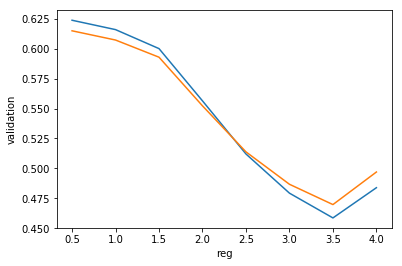

In [5]:
# 2.1
learner = ml.linearC.linearClassify()
linear_classfier_print(learner, XtS, Yt, XvS, Yva)

In [6]:
# 2.2
Xt2 = ml.transforms.fpoly(Xt, 2, bias=False)
Xv2 = ml.transforms.fpoly(Xva, 2, bias=False)
print(Xt2.shape[1])

# We originally have 14 features from x1 -> x14
# we pick 2 different from them to combine a new xi * xj feature, it will be 14 * 13 / 2 -> 91
# we convert every feature to its square  x1 -> x1 * x1 , it will be 14

# so, totally 14 + 14 + 91 = 119

119


/Users/tiv/Desktop/UCI/CS273A/HW4/mltools/base.py:96: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
/Users/tiv/Desktop/UCI/CS273A/HW4/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )
/Users/tiv/Desktop/UCI/CS273A/HW4/mltools/linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))


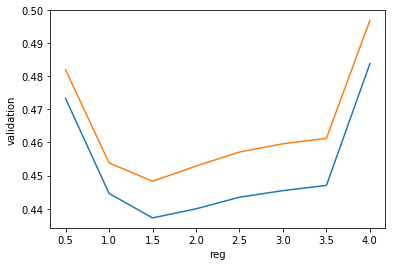

In [7]:
# 2.3
XtS2, params = ml.rescale(Xt2)
XvS2, _ = ml.rescale(Xv2, params)
learner_trans = ml.linearC.linearClassify()
linear_classfier_print(learner_trans, XtS2, Yt, XvS2, Yva)

###  Nearest Neighbors (20 points)

In [8]:
def nearest_neighbors_print(XtS, Yt, XvS, Yva):
    klist = [1, 5, 10, 50, 100, 200, 400] 
    tr_auc = []
    va_auc = []
    for k in klist:
        learner = ml.knn.knnClassify()
        learner.train(XtS, Yt, K=k, alpha=0.0)
        tr_auc.append(learner.auc(XtS, Yt))
        va_auc.append(learner.auc(XvS, Yva))

    plt.plot(klist, tr_auc)
    plt.xlabel('k')
    plt.ylabel('train')

    plt.plot(klist, va_auc)
    plt.xlabel('k')
    plt.ylabel('validation')

    plt.show()

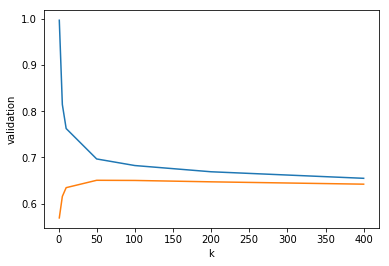

In [9]:
# 3.1
nearest_neighbors_print(XtS, Yt, XvS, Yva)

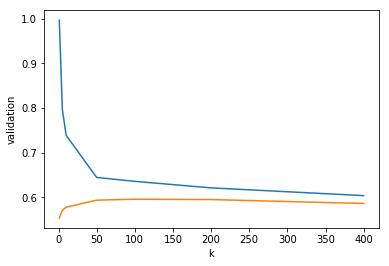

In [10]:
# 3.2
nearest_neighbors_print(Xt, Yt, Xva, Yva)

In [ ]:
# 3.3
K = range(1,10,1) # Or something else
A = range(0,5,1) # Or something else
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner = ml.knn.knnClassify()
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt)  # train learner using k and a
        va_auc[i][j] = learner.auc(XvS, Yva)
        

# training AUC Data
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(K))
ax.set_yticklabels(['']+list(A))
plt.show()

# validation AUC Data
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(K))
ax.set_yticklabels(['']+list(A))
plt.show()

/Users/tiv/Desktop/UCI/CS273A/HW4/mltools/knn.py:103: RuntimeWarning: invalid value encountered in true_divide
  prob[i,:] = count / count.sum()    # save (soft) results


### Decision Trees (20 points)